![](https://github.com/IntelRealSense/librealsense/raw/master/doc/img/realsense.png)


## Introduction

The notebook offers a quick hands-on introduction to Intel RealSense Depth-Sensing technology. 

> Click **OPEN IN PLAYGROUND** to try it out for yourself! 

> Once in PLAYGROUND mode, click **COPY TO DRIVE** and then **Runtime** > **Run All** to evaluate all cells.

> **Have a Question?** [Open new issue on our GitHub](https://github.com/IntelRealSense/librealsense/issues/new)

## The Setup
We start by installing [Intel RealSense SDK 2.0](http://www.github.com/IntelRealSense/librealsense) to our cloud environment:

In [ ]:
!apt-get -q install -y libusb-1.0.0-dev
!pip install pyrealsense2
!wget -N http://realsense-hw-public.s3.amazonaws.com/rs-tests/TestData/object_detection.bag
print("SDK + Sample Data Deployed")

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libusb-1.0-doc
The following NEW packages will be installed:
  libusb-1.0-0-dev libusb-1.0-doc
0 upgraded, 2 newly installed, 0 to remove and 24 not upgraded.
Need to get 237 kB of archives.
After this operation, 1,821 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libusb-1.0-0-dev amd64 2:1.0.23-2build1 [64.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libusb-1.0-doc all 2:1.0.23-2build1 [172 kB]
Fetched 237 kB in 0s (558 kB/s)
Selecting previously unselected package libusb-1.0-0-dev:amd64.
(Reading database ... 122531 files and directories currently installed.)
Preparing to unpack .../libusb-1.0-0-dev_2%3a1.0.23-2build1_amd64.deb ...
Unpacking libusb-1.0-0-dev:amd64 (2:1.0.23-2build1) ...
Selecting previously unselected package libusb-1.0-doc.
Preparing to unpack .../libusb-1.0-doc_2

## The Tools
We are planning to use the following packages:

In [ ]:
import cv2                       # state of the art computer vision algorithms library
import numpy as np               # fundamental package for scientific computing
import matplotlib.pyplot as plt  # 2D plotting library which produces publication quality figures
import pyrealsense2 as rs        # Intel RealSense cross-platform open-source API
print("Environment Ready")

Environment Ready


## The API
Next, we will open depth and RGB streams from pre-recorded file and capture a set of frames:


In [ ]:
# Setup:
pipe = rs.pipeline()
cfg = rs.config()
cfg.enable_device_from_file("/content/sample_data/20230520_173339.bag")
profile = pipe.start(cfg)

# Skip 5 first frames to give the Auto-Exposure time to adjust
for x in range(5):
  pipe.wait_for_frames()
  
# Store next frameset for later processing:
frameset = pipe.wait_for_frames()
color_frame = frameset.get_color_frame()
depth_frame = frameset.get_depth_frame()

# Cleanup:
pipe.stop()
print("Frames Captured")

Frames Captured


## RGB Data
Let's start with accessing the color componnent of the frameset:

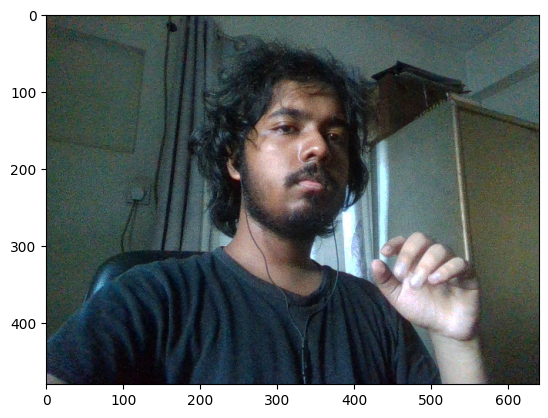

In [ ]:
color = np.asanyarray(color_frame.get_data())
plt.rcParams["axes.grid"] = False
plt.imshow(color)

## Depth Data
Now, we will visualize the depth map captured by the RealSense camera:

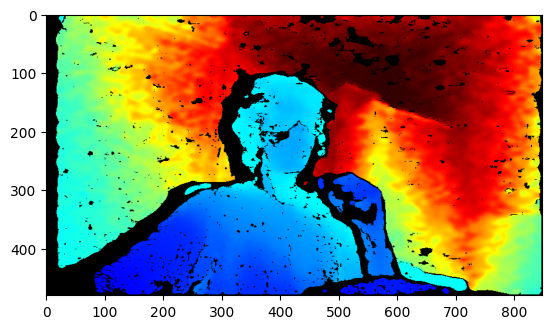

In [ ]:
colorizer = rs.colorizer()
colorized_depth = np.asanyarray(colorizer.colorize(depth_frame).get_data())
plt.imshow(colorized_depth)

## Stream Alignment
Upon closer inspection you can notice that the two frames are not captured from the same physical viewport.

To combine them into a single RGBD image, let's align depth data to color viewport:

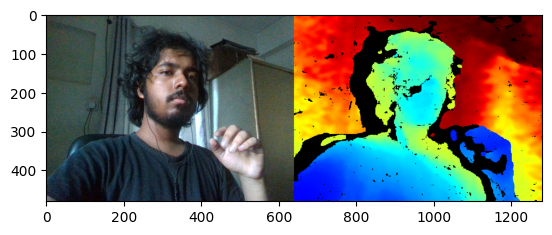

In [ ]:
# Create alignment primitive with color as its target stream:
align = rs.align(rs.stream.color)
frameset = align.process(frameset)

# Update color and depth frames:
depth_frame = frameset.get_depth_frame()
colorized_depth = np.asanyarray(colorizer.colorize(depth_frame).get_data())

# Show the two frames together:
images = np.hstack((color, colorized_depth))
plt.imshow(images)

Now the two images are pixel-perfect aligned and you can use depth data just like you would any of the other channels.

## Object Detection

Next, we will take advantage of widely popular **MobileNet SSD Model** to recognize and localize objects in the scene and use additional depth data to enrich our prediction.

This is a rather simple example, but it gives you a taste of what can be accomplished by combining depth with modern computer vision.

> **Want to learn more?** Visit [realsense.intel.com](http://realsense.intel.com) and [github.com/IntelRealSense](http://www.github.com/IntelRealSense/librealsense)